In [1]:
import sys

sys.path.append("..")

In [2]:
# create agent and environment

from qurious.environments import GridWorld

# Create a 10x10 maze with a guaranteed path
env = GridWorld(
    width=10,
    height=10,
    start_pos=(0, 0),  # Start at top-left
    goal_pos=[(9, 9)],  # Goal at bottom-right
    obstacles=[
        # Top horizontal walls
        (0, 3),
        (1, 1),
        (1, 3),
        (1, 5),
        (1, 7),
        (1, 8),
        (2, 1),
        (2, 5),
        (2, 8),
        # Middle section
        (3, 1),
        (3, 3),
        (3, 5),
        (3, 7),
        (4, 3),
        (4, 5),
        (4, 7),
        (5, 0),
        (5, 1),
        (5, 7),
        (5, 9),
        # Bottom section
        (6, 1),
        (6, 3),
        (6, 5),
        (6, 7),
        (6, 9),
        (7, 1),
        (7, 3),
        (7, 5),
        (7, 6),
        (7, 7),
        (8, 1),
        (8, 3),
        (8, 5),
        (9, 5),
        (9, 8),
    ],
    terminal_reward=0.0,
    step_penalty=0.1,
    max_steps=200,
)

# Render the maze
print(env.render())

A . . # . . . . . .
. # . # . # . # # .
. # . . . # . . # .
. # . # . # . # . .
. . . # . # . # . .
# # . . . . . # . #
. # . # . # . # . #
. # . # . # # # . .
. # . # . # . . . .
. . . . . # . . # G



In [3]:
from qurious.agents import SarsaAgent
from qurious.policy import DeterministicTabularPolicy, EpsilonGreedyPolicy
from qurious.value_fns import TabularActionValueFunction

from IPython.display import clear_output
from time import sleep

# Create agent components
n_states = env.get_num_states()
n_actions = env.get_num_actions()

# Q-function
q_function = TabularActionValueFunction(n_states, n_actions)

# Base policy (will be updated based on Q-values)
base_policy = DeterministicTabularPolicy(n_states, n_actions)

# Epsilon-greedy exploration policy
epsilon = 0.5
policy = EpsilonGreedyPolicy(base_policy, epsilon, decay_rate=0.99)

# Create agent
agent = SarsaAgent(policy, q_function, gamma=0.99)
agent.enable_experience_tracking()


In [4]:
from qurious.utils import train_agent

train_agent(env, agent, num_episodes=1000)

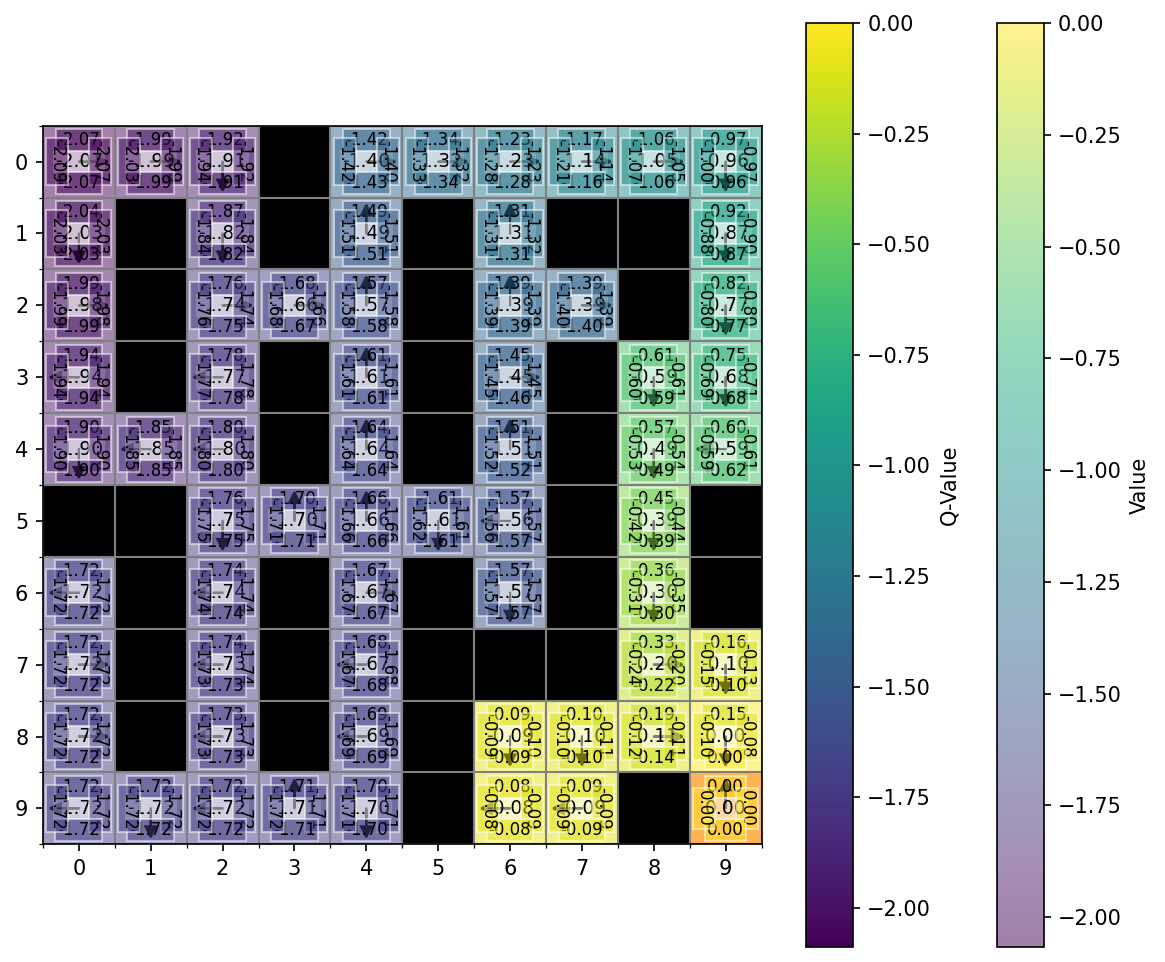

In [ ]:
from qurious.visualization import (
    GridWorldVisualizer,
    AgentLayer,
    GridLayer,
    PolicyLayer,
    StateValueLayer,
    ActionValueLayer,
)

# Create visualizer
viz = GridWorldVisualizer(env)
viz.add_layer(GridLayer())
viz.add_layer(AgentLayer())
viz.add_layer(StateValueLayer(agent.Q))
# viz.add_layer(ActionValueLayer(agent.Q))
viz.add_layer(PolicyLayer(base_policy, arrow_color="black"))


viz.render_matplotlib(figsize=(8, 8))
viz.savefig("sarsa_agent.png")

In [ ]:
def run_agent(env, agent, max_steps=200):
    state = env.reset()
    done = False
    step = 0
    while not done and step < max_steps:
        action = agent.choose_action(state)
        next_state, reward, done, _ = env.step(action)
        state = next_state
        step += 1

        clear_output(wait=True)
        print(env.render())
        sleep(0.1)

    return step


steps = run_agent(env, agent, max_steps=200)
print(f"Ran for {steps} steps")